In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import seaborn
import pandas as pd
import numpy as np
from utils import eda
from datetime import timedelta
from __future__ import division

seaborn.set()

# Basic (Titanic)

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/public-sparkbeyond/PublicDatasets/titanic_train.csv')

In [3]:
df.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna('Empty')

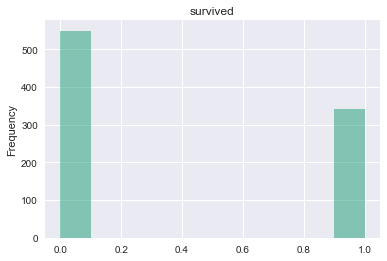

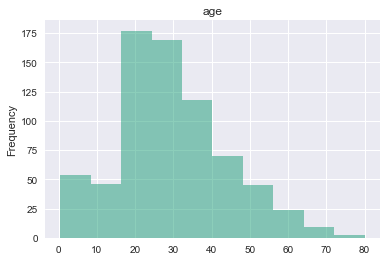

In [6]:
eda.Basic().plot_numeric_distribution(df, 'survived'); plt.show()
eda.Basic().plot_numeric_distribution(df, 'age'); plt.show()

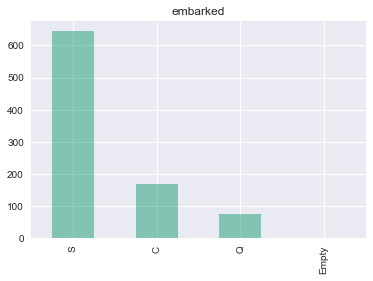

In [7]:
eda.Basic().plot_categorical_distribution(df, 'embarked')

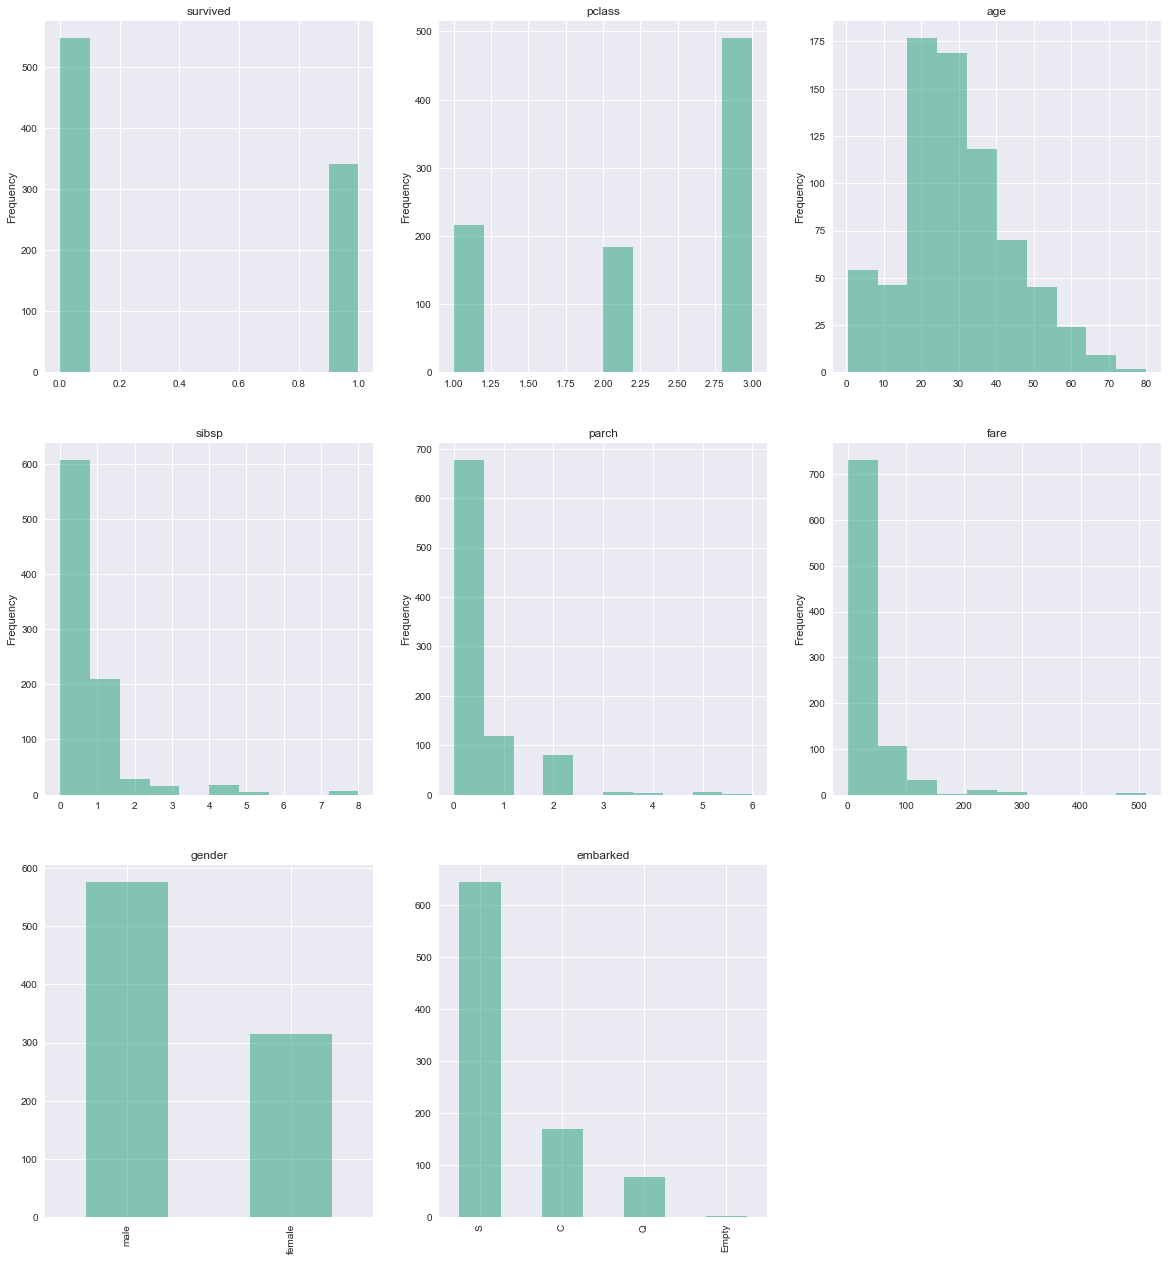

In [8]:
eda.Basic().plot_multiple_distributions(df)

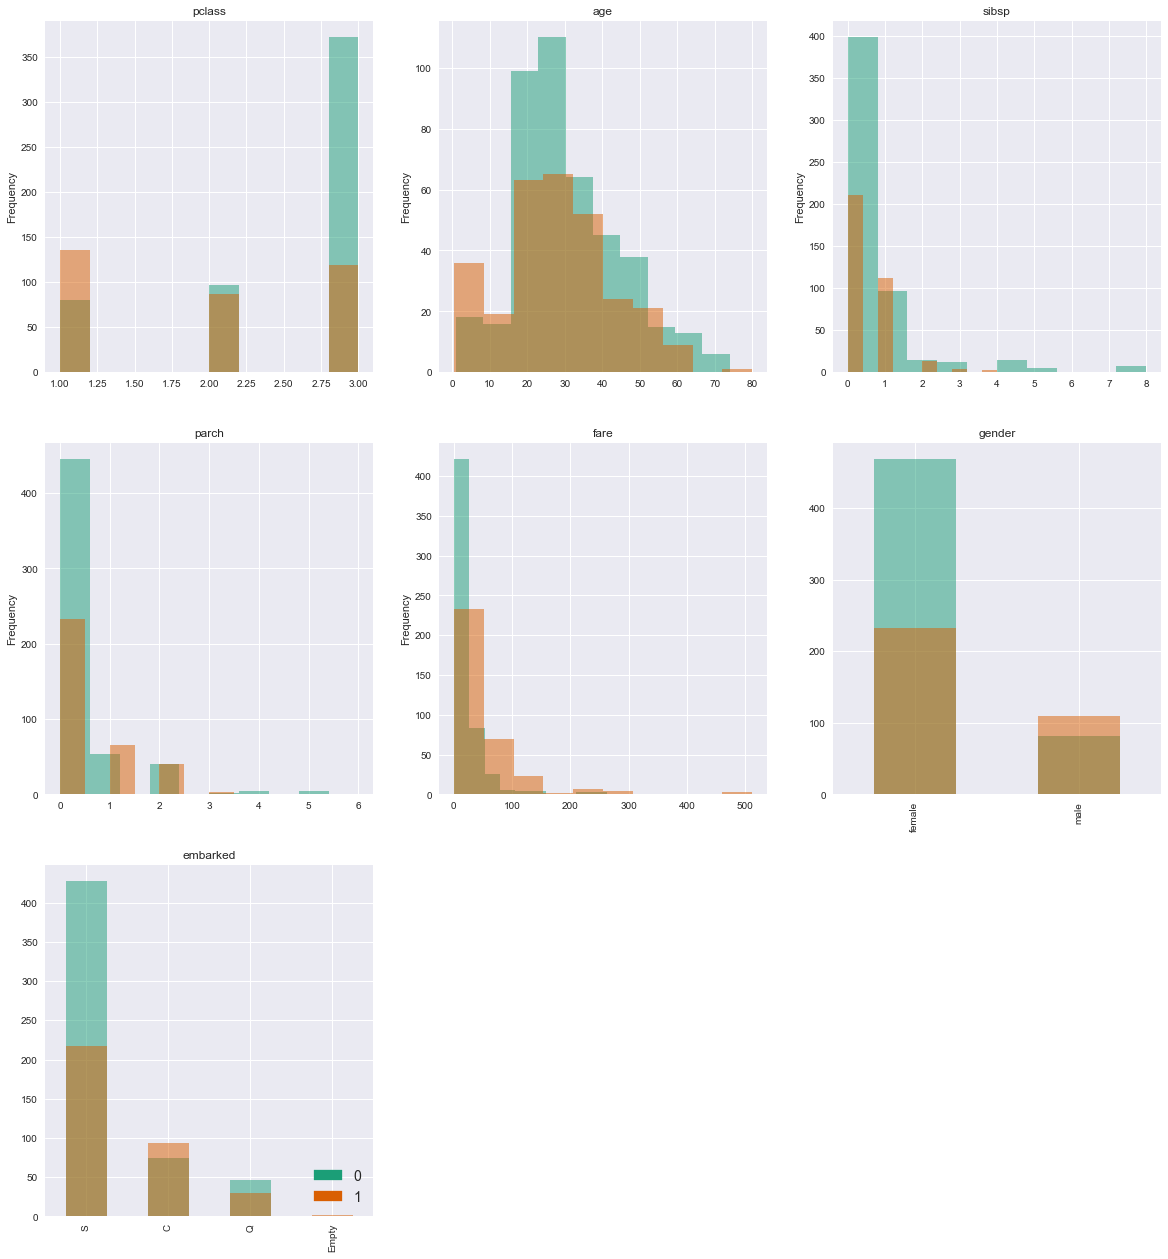

In [9]:
eda.Basic().plot_multiple_distributions_overlay(df, 'survived')

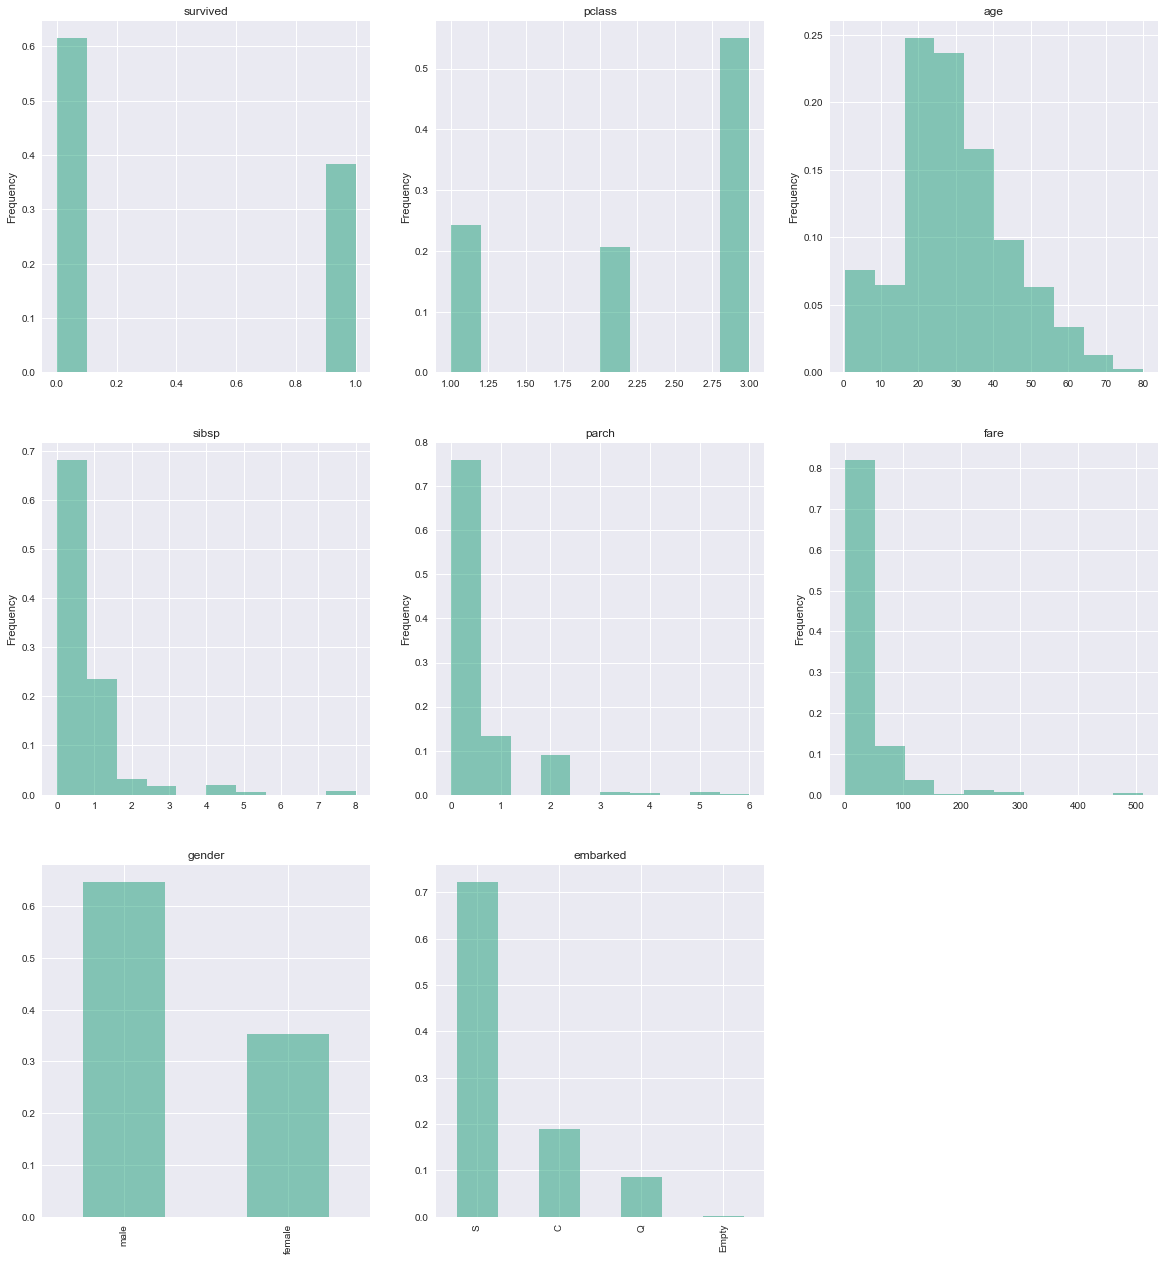

In [10]:
eda.Basic().plot_multiple_distributions(df, normed=True)

# Time Series

## Categorical (Chicago Food Inspection)

In [2]:
url = 'https://s3.amazonaws.com/public-sparkbeyond/training/chicagoFoodInsp/trainFinal2kAug.csv.gz'
df = pd.read_csv(url, compression = 'gzip', parse_dates= ['Inspection.Date'])

In [3]:
df.columns = map(str.lower, df.columns)
rename_dict = {'inspection.id': 'inspectionID', 
               'license..': 'license',
               'facility.type': 'facilityType',
               'inspection.date': 'inspectionDate',
               'inspection.type': 'inspectionType',
               'foodname': 'foodName'}
df.rename(columns=rename_dict, inplace=True)

In [4]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna('Empty')
df.head()

,inspectionID,license,facilityType,risk,address,city,state,zip,inspectionDate,inspectionType,results,violations,latitude,longitude,location,foodName
0,1561612,2418345,Restaurant,Risk 3 (Low),1226 N WELLS ST,CHICAGO,IL,60610,2015-07-28,License,Pass,Empty,41.904706,-87.634657,"(41.90470619187174, -87.6346566546307)",SNAP KITCHEN_SNAP KITCHEN
1,1607299,24201,School,Risk 1 (High),3221 N SACRAMENTO BLVD,CHICAGO,IL,60618,2016-01-15,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.940019,-87.702598,"(41.94001885475702, -87.70259824915517)",CARL VON LINNE ELEMENTARY SCHOOL_CARL VON LINN...
2,1385912,1980004,Restaurant,Risk 1 (High),5841 S MARYLAND AVE,CHICAGO,IL,60637,2015-01-26,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.788311,-87.604770,"(41.788311258410836, -87.60476983588067)",AU BON PAIN_AU BON PAIN
3,1522212,2372990,Restaurant,Risk 1 (High),226 W SCHILLER ST,CHICAGO,IL,60610,2015-01-23,License Re-Inspection,Pass,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",41.907757,-87.635729,"(41.90775713038418, -87.63572939840577)",HANDCUT FOODS_CATHERINE COOK SCHOOL
4,1621206,2196818,Restaurant,Risk 1 (High),6249-6251 N MILWAUKEE,CHICAGO,IL,60646,2016-01-26,Canvass,Fail,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",41.994969,-87.785437,"(41.99496878030707, -87.78543707203039)",INGS CHINA KING_INGS CHINA KING


In [5]:
# choose time resolution (print min-max datetime to decide):
df.inspectionDate.min(), df.inspectionDate.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2016-05-19 00:00:00'))

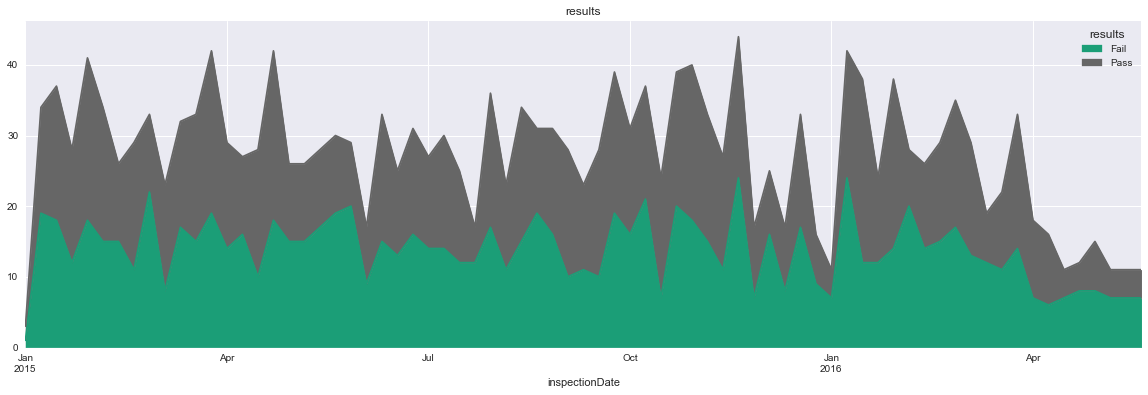

In [6]:
eda.TimeSeries().plot_categorical_distribution_overtime(df, var_column='results', date_column='inspectionDate',
                                          time_resolution='1w')

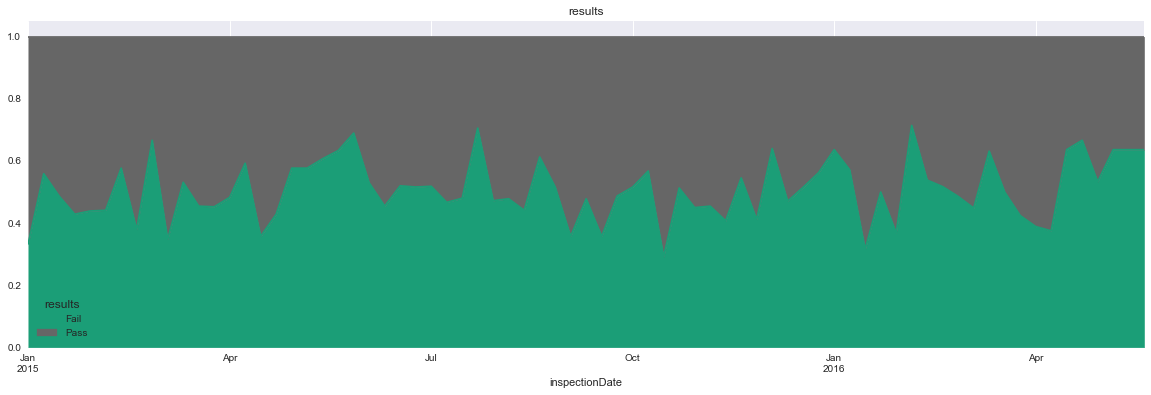

In [7]:
eda.TimeSeries().plot_categorical_distribution_overtime(df, var_column='results', date_column='inspectionDate',
                                          time_resolution='1w', normed=True)

## Numeric (Turbofan)

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/public-sparkbeyond/training/turbofan/turboFanXS_train.csv")
df.cycle = pd.to_datetime(df.cycle, infer_datetime_format=True)
df.head()

,UnitNumber,cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,V27,V28,cycleNumber,RemainingUsefulLife
0,22,2016-01-01 00:01:34,-0.0003,0.0001,100,518.67,642.74,1589.46,1415.25,14.62,...,0.03,395,2388,100,38.65,23.3048,NaN,NaN,94,108
1,19,2016-01-01 00:00:50,-0.0007,-0.0004,100,518.67,642.77,1593.96,1415.17,14.62,...,0.03,395,2388,100,38.96,23.2549,NaN,NaN,50,108
2,41,2016-01-01 00:01:34,0.0017,0.0005,100,518.67,641.86,1581.17,1399.70,14.62,...,0.03,393,2388,100,39.10,23.3619,NaN,NaN,94,122
3,2,2016-01-01 00:03:54,-0.0022,-0.0002,100,518.67,643.49,1588.68,1412.07,14.62,...,0.03,394,2388,100,38.87,23.2635,NaN,NaN,234,53
4,27,2016-01-01 00:01:12,-0.0001,-0.0005,100,518.67,642.85,1584.80,1409.40,14.62,...,0.03,392,2388,100,38.82,23.2761,NaN,NaN,72,84


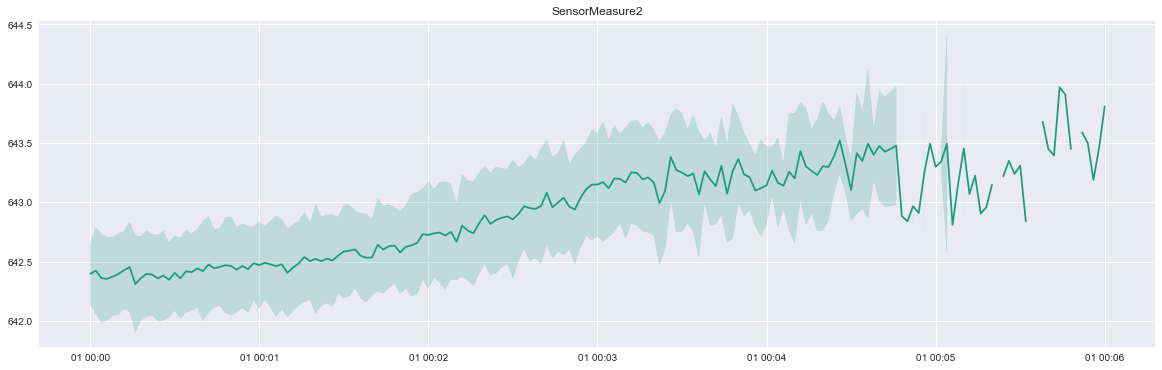

In [10]:
eda.TimeSeries().plot_numeric_fixed(df, 'SensorMeasure2', 'cycle', time_resolution='2s', tw=False, 
                                    key_column='UnitNumber',key_ids=None, reference_date=df.cycle.max(), offset=300)

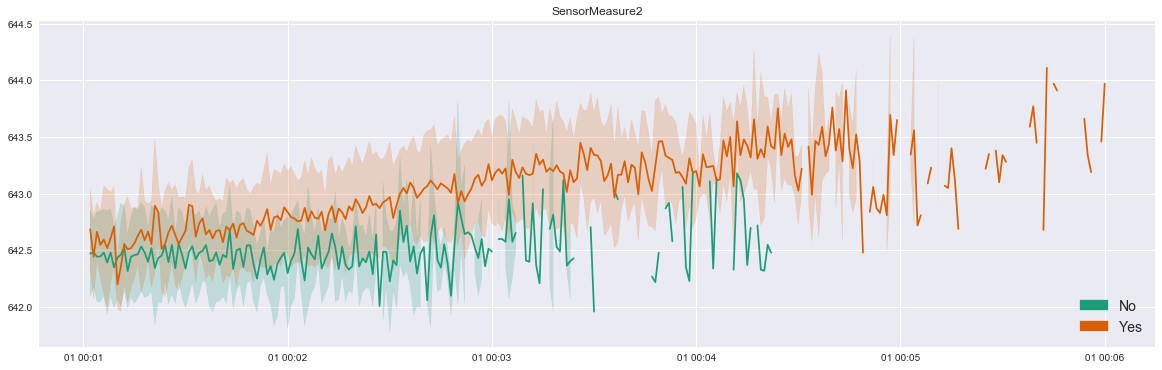

In [11]:
var_column = 'SensorMeasure2'
date_column = 'cycle'
key_column = 'UnitNumber'
split_column = 'aboutToDie'

new_target = df.RemainingUsefulLife.copy()
new_target.loc[new_target < 100] = 'Yes'
new_target.loc[new_target != 'Yes'] = 'No'
df = df.assign(aboutToDie=new_target)
eda.TimeSeries().plot_numeric_overlay(df, split_column, var_column, date_column, time_resolution='1s',
                            tw=True, reference_date=df.cycle.max(), offset=300, key_column=key_column, type='fixed')

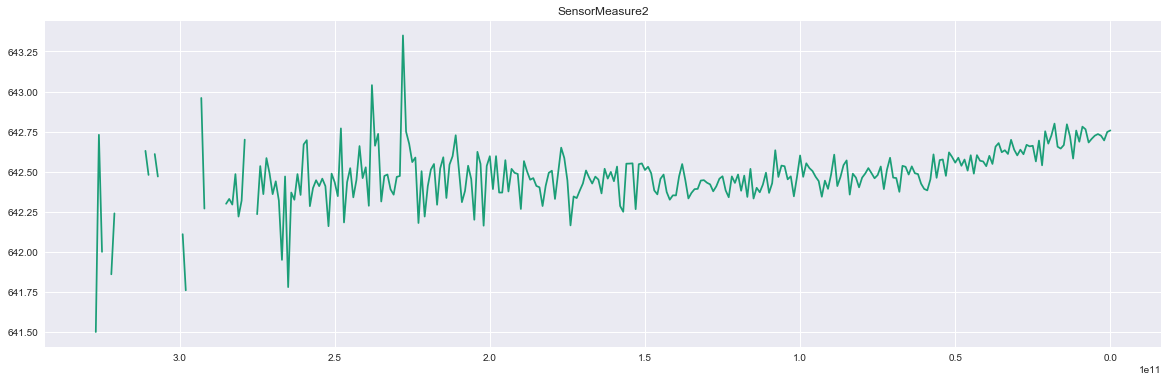

In [12]:
main_df = df[['UnitNumber','cycle','RemainingUsefulLife', 'aboutToDie']]    # keep only the relevant columns
context_df = df.drop(['RemainingUsefulLife','cycleNumber'], axis=1) # remove the target and leaking column
main_df = main_df.sample(100)
eda.TimeSeries().plot_numeric_relative(main_df, context_df, var_column, date_column, key_column, key_ids=None,
                             time_resolution='1s', offset=500)

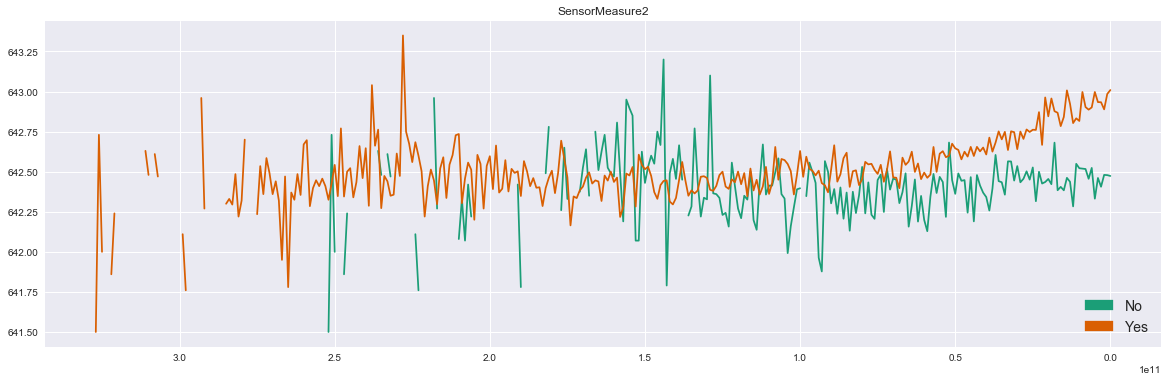

In [14]:
eda.TimeSeries().plot_numeric_overlay(main_df=main_df, context_df=context_df,
                            split_column=split_column, var_column=var_column, date_column=date_column,
                            key_column=key_column, time_resolution='1s', offset=500, type='relative')

In [ ]:
# EDA checklist:
# plot target label distribution
# plot target labels distributions over time
# plot keys matching
# plot summary stat table
# plot vars dists with respect to target, with respect to train and test